In [12]:
import pandas as pd

# Lokasi file CSV
file_path = '/Users/shannenwibisono/Desktop/Capstone/FINAL/BBCALSTMvsActualW100.csv'
file_path2 = '/Users/shannenwibisono/Desktop/Capstone/FINAL/BBCACNNvsActualW100.csv'

# Membaca file CSV ke dalam dataframe
data = pd.read_csv(file_path)
data2 = pd.read_csv(file_path2)

# Menampilkan beberapa baris pertama dari dataframe
print(data.head())
print(data2.head())

         Date  Average_Prediction  Actual
0  2023-09-13         9118.324473  9075.0
1  2023-09-14         9097.234863  9100.0
2  2023-09-15         9083.972891  9000.0
3  2023-09-18         9058.270820  9000.0
4  2023-09-19         9031.549434  9075.0
         Date  Average_Prediction  Actual
0  2023-09-13         9195.892090  9075.0
1  2023-09-14         9180.334004  9100.0
2  2023-09-15         9181.488125  9000.0
3  2023-09-18         9152.320117  9000.0
4  2023-09-19         9139.970215  9075.0


In [18]:
def hitung_MAPE(data_frame, name, windowsize, prediksi_col, actual_col):
    # Hitung absolute percentage error (APE)
    data_frame['APE'] = abs((data_frame[prediksi_col] - data_frame[actual_col]) / data_frame[actual_col]) * 100
    
    # Hitung MAPE (Mean Absolute Percentage Error)
    MAPE = data_frame['APE'].mean()
    
    # Tampilkan hasil MAPE
    print("MAPE", name, "window size", windowsize, ":", MAPE)
    
    # Return MAPE
    return MAPE

# Contoh penggunaan fungsi untuk data frame 'data_frame_hasil' dengan kolom 'Average_Prediction' dan 'Actual'
MAPE = hitung_MAPE(data, "LSTM", "100", "Average_Prediction", "Actual")
MAPE = hitung_MAPE(data2, "CNN", "100", "Average_Prediction", "Actual")

MAPE LSTM window size 100 : 1.179679820874381
MAPE CNN window size 100 : 1.515415729202294


In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

def hitung_RMSE(data_frame, name, windowsize, prediksi_col, actual_col):
    # Hitung RMSE
    RMSE = np.sqrt(mean_squared_error(data_frame[actual_col], data_frame[prediksi_col]))
    
    # Tampilkan hasil RMSE
    print("RMSE", name, "window size", windowsize, ":", RMSE)
    
    # Return RMSE
    return RMSE

# Contoh penggunaan fungsi untuk data frame 'data_frame_hasil' dengan kolom 'Average_Prediction' dan 'Actual'
RMSE = hitung_RMSE(data, "LSTM", "100", "Average_Prediction", "Actual")
RMSE = hitung_RMSE(data2, "CNN", "100", "Average_Prediction", "Actual")

RMSE LSTM window size 100 : 136.4056129252766
RMSE CNN window size 100 : 166.02914472025623


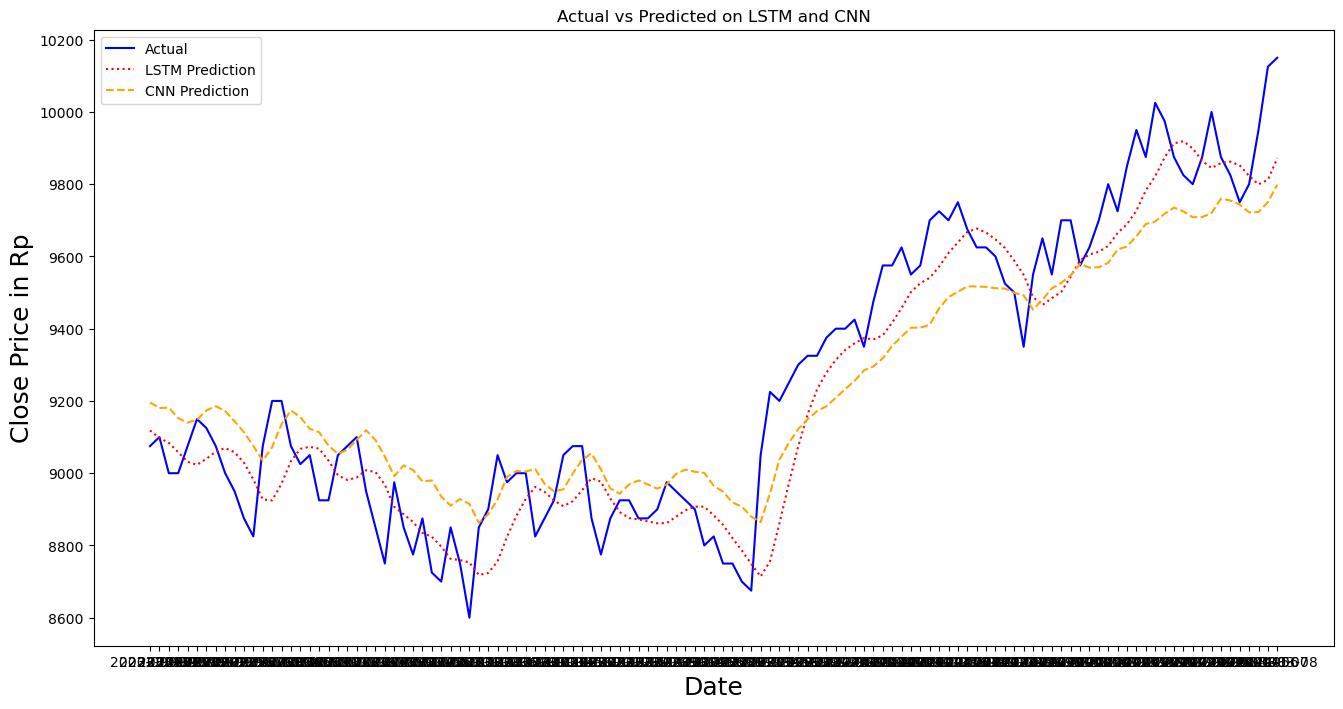

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting actual and predicted data on one plot
plt.figure(figsize=(16,8))
plt.title('Actual vs Predicted on LSTM and CNN')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in Rp', fontsize=18)

# Plot actual data
plt.plot(data['Actual'], label='Actual', linestyle='-', color='blue')

# Plot predicted data LSTM 
plt.plot(data['Average_Prediction'], label='LSTM Prediction', linestyle=':', color='red')

# Plot predicted data CNN 
plt.plot(data2['Date'], data2['Average_Prediction'], label='CNN Prediction', linestyle='--', color='orange')

# Add legend
plt.legend(loc='upper left')
plt.show()

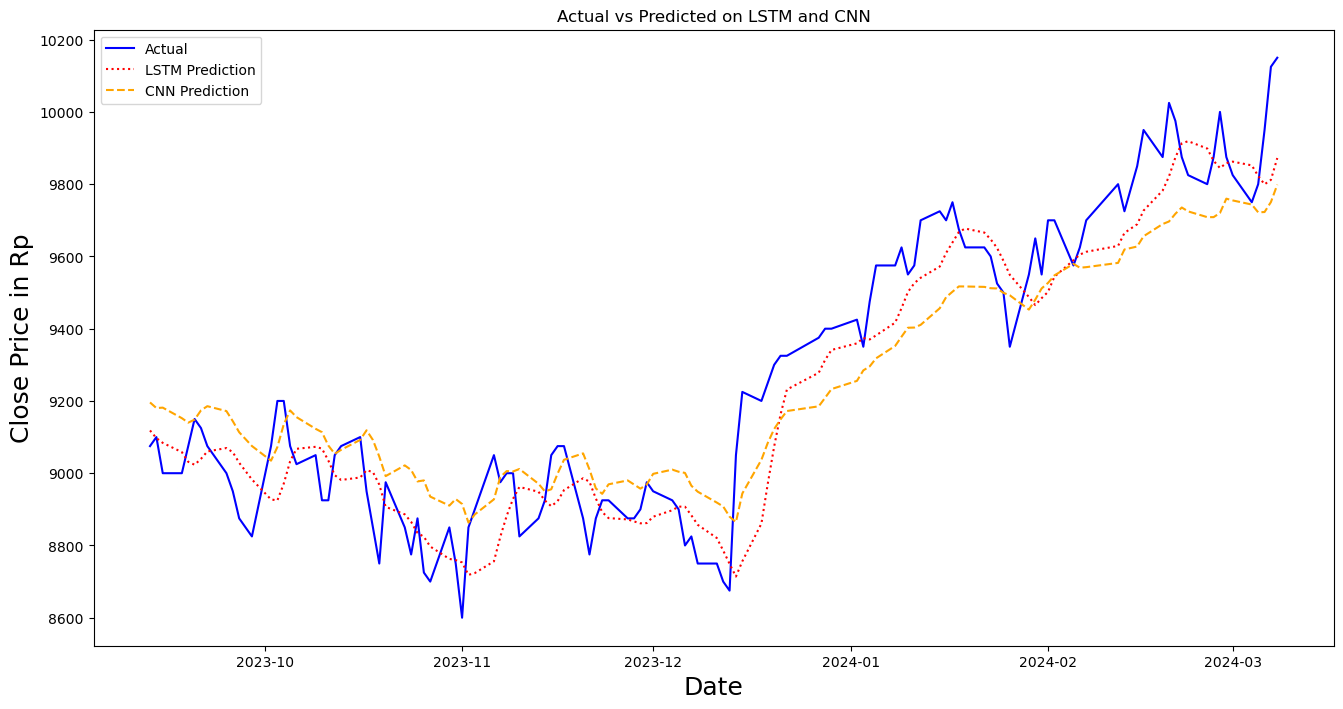

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data2['Date'] = pd.to_datetime(data2['Date'])

# Plotting actual and predicted data on one plot
plt.figure(figsize=(16,8))
plt.title('Actual vs Predicted on LSTM and CNN')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in Rp', fontsize=18)

# Plot actual data
plt.plot(data['Date'], data['Actual'], label='Actual', linestyle='-', color='blue')

# Plot predicted data LSTM 
plt.plot(data['Date'], data['Average_Prediction'], label='LSTM Prediction', linestyle=':', color='red')

# Plot predicted data CNN 
plt.plot(data2['Date'], data2['Average_Prediction'], label='CNN Prediction', linestyle='--', color='orange')

# Add legend
plt.legend(loc='upper left')
plt.show()